# Data Collection 

You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model 

In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. 
 

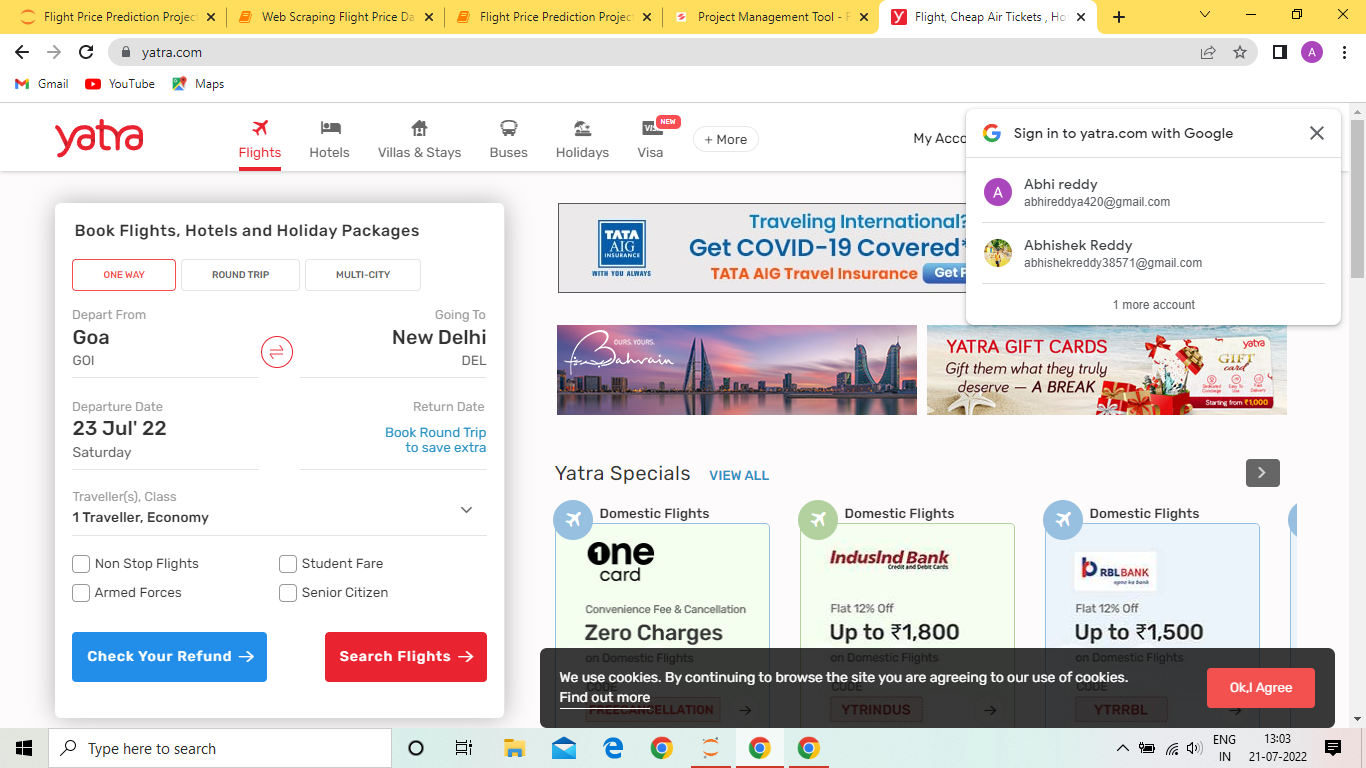

### Importing libraries require for scraping

In [3]:
import pandas as pd
import numpy as np
import time
import selenium
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

import warnings
warnings.filterwarnings('ignore')

### Importing webdriver

In [5]:
driver=webdriver.Chrome(r'C:\Users\dell\Downloads\chromedriver_win32 (2)\chromedriver.exe')

### Opening yatra.com website in browser

In [6]:
url = "https://www.yatra.com/"
driver.get(url)
time.sleep(2)

## 1. Extracting Economy flights from New Dehli to Mumbai

#### Opening Ecomnomy flights from New Dehli to Mumbai on 21 Jul 2022

In [35]:
url = "https://flight.yatra.com/air-search-ui/dom2/trigger?type=O&viewName=normal&flexi=0&noOfSegments=1&origin=DEL&originCountry=IN&destination=BOM&destinationCountry=IN&flight_depart_date=21%2F07%2F2022&ADT=1&CHD=0&INF=0&class=Economy&source=fresco-home&unqvaldesktop=271927774297"
driver.get(url)
time.sleep(2)

In [36]:
Airlines = []
Aeroplane = []
Dept_time = []
Arrival_time = []
Source = []
Destination = []
Duration = []
Stops = []
Date = []
Price = []

In [37]:
from tqdm import tqdm
for _ in tqdm (range(0,50)):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,2000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,-500)","")

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.46it/s]


In [38]:
flights=driver.find_elements_by_xpath('//div[@class="flight-det table full-width clearfix"]')
len(flights)

80

In [39]:
def flights():
    # Extracting Airlines Name Via Xpath
    Airliness=driver.find_elements_by_xpath('//div[@class="fs-13 airline-name no-pad col-8"]/span[1]')
    for i in Airliness:
        Airlines.append(i.text.replace('/n',' '))
        
    #Extracting Aeroplane Name Via Xpath
    Aeroplanes=driver.find_elements_by_xpath('//p[@class="normal fs-11 font-lightestgrey no-wrap fl-no"]/span')
    for i in Aeroplanes:
        Aeroplane.append(i.text)
        
    #Extracting Departure Time of Flight Via Xpath
    dept_time=driver.find_elements_by_xpath('//div[@class="i-b pr"]')
    for i in dept_time:
        Dept_time.append(i.text)
    
    #Extracting Arrival Time of Flight Via Xpath
    arrival=driver.find_elements_by_xpath('//p[@class="bold fs-15 mb-2 pr time"]')
    for i in arrival:
        Arrival_time.append(i.text.replace('\n+ 1 day',''))
        
    #Extracting Source of Flight Via Xpath
    source=driver.find_elements_by_xpath('//div[@class="i-b col-4 no-wrap text-right dtime col-3"]/p')
    for i in source:
        Source.append(i.text)
        
    #Extracting Destination of Flight Via Xpath
    destination=driver.find_elements_by_xpath('//div[@class="i-b pdd-0 text-left atime col-5"]/p[2]')
    for i in destination:
        Destination.append(i.text)
        
    #Extracting Duration of Flight Via Xpath
    duration=driver.find_elements_by_xpath('//div[@class="stop-cont pl-13"]/p')
    for i in duration:
        Duration.append(i.text)
        
    #Extracting Stops Via Xpath
    stop=driver.find_elements_by_xpath('//div[@class=" font-lightgrey fs-10 tipsy i-b fs-10"]/span[1]')
    for i in stop:
        Stops.append(i.text)
    
    #Extracting Flight Ticket Price Via Xpath
    count=0
    price=driver.find_elements_by_xpath('//div[@class="i-b tipsy fare-summary-tooltip fs-18"]')
    for i in price:
        Price.append(i.text.replace(',',''))
        count=count + 1
    else:
        count=count + 1
        pass
    
    # Clicking on Flights details element
    Button = driver.find_elements_by_xpath('//div[@class="link-color fs-12 cursor-pointer"]/span')
    driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="link-color fs-12 cursor-pointer"]/span'))))
    time.sleep(1)
    
    #Extracting Date Via Xpath
    date=driver.find_element_by_xpath('//div[@class="bold fs-12 mb-5"]')
    a=date.text
    for i in tqdm(range(count-1)):
        Date.append(a)
    else:
        pass

In [40]:
flights()

100%|███████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 10002.81it/s]


In [78]:
def variables():
    print(len(Aeroplane))
    print(len(Airlines))
    print(len(Dept_time))
    print(len(Arrival_time))
    print(len(Source))
    print(len(Destination))
    print(len(Duration))
    print(len(Stops))
    print(len(Date))
    print(len(Price))

In [42]:
variables()

80 ['G8-717/537', 'UK-951', 'UK-933', '6E-5318', '6E-2519', '6E-2176', '6E-5306', '6E-864', 'SG-8709', '6E-6261', '6E-2017', 'G8-323', 'SG-8169', 'G8-346', 'G8-330', 'SG-711', '6E-2114', '6E-2168/6598', '6E-153/6794', '6E-2141/5302', '6E-2141/803', '6E-6939/6794', '6E-607/6004', 'SG-2935/3002', 'SG-8150/945', 'SG-8492/945', 'AI-805', 'AI-863', 'AI-624', 'AI-605', 'AI-441', 'UK-929/918', 'UK-929/956', 'UK-929/936', '6E-6822/983', '6E-698/5246', 'UK-969/956', 'UK-969/918', 'UK-969/936', '6E-761/983', '6E-212/6031', '6E-5018/6413', 'G8-199/2507', 'UK-941', 'UK-953', 'UK-981', 'AI-471/644', 'UK-935/508', 'AI-531/638', 'UK-985', 'AI-403/656', 'AI-451/651', 'AI-471/646', 'AI-883/684', 'AI-883/664', 'AI-883/697', 'AI-415/732', 'AI-407/732', 'AI-811/626', 'UK-673/622', 'AI-479/650', 'UK-977', 'UK-955', 'AI-473/670', 'UK-637/652', 'UK-706/652', 'AI-504/640', 'AI-504/604', 'AI-807/640', 'AI-807/604', 'UK-871/872', 'UK-637/654', 'UK-871/874', 'UK-879/872', 'UK-871/878', 'UK-899/872', 'UK-879/874'

#### Opening Ecomnomy flights from New Dehli to Mumbai on 22 Jul 2022

In [46]:
url ="https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=22%2F07%2F2022&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1658380224205&viewName=normal" 
driver.get(url)
time.sleep(2)

In [47]:
from tqdm import tqdm
for _ in tqdm (range(0,50)):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,2000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,-500)","")

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:18<00:00,  2.67it/s]


In [48]:
flightss=driver.find_elements_by_xpath('//div[@class="flight-det table full-width clearfix"]')
len(flightss)

105

In [49]:
flights()

100%|████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<?, ?it/s]


In [50]:
variables()

185 ['G8-717/537', 'UK-951', 'UK-933', '6E-5318', '6E-2519', '6E-2176', '6E-5306', '6E-864', 'SG-8709', '6E-6261', '6E-2017', 'G8-323', 'SG-8169', 'G8-346', 'G8-330', 'SG-711', '6E-2114', '6E-2168/6598', '6E-153/6794', '6E-2141/5302', '6E-2141/803', '6E-6939/6794', '6E-607/6004', 'SG-2935/3002', 'SG-8150/945', 'SG-8492/945', 'AI-805', 'AI-863', 'AI-624', 'AI-605', 'AI-441', 'UK-929/918', 'UK-929/956', 'UK-929/936', '6E-6822/983', '6E-698/5246', 'UK-969/956', 'UK-969/918', 'UK-969/936', '6E-761/983', '6E-212/6031', '6E-5018/6413', 'G8-199/2507', 'UK-941', 'UK-953', 'UK-981', 'AI-471/644', 'UK-935/508', 'AI-531/638', 'UK-985', 'AI-403/656', 'AI-451/651', 'AI-471/646', 'AI-883/684', 'AI-883/664', 'AI-883/697', 'AI-415/732', 'AI-407/732', 'AI-811/626', 'UK-673/622', 'AI-479/650', 'UK-977', 'UK-955', 'AI-473/670', 'UK-637/652', 'UK-706/652', 'AI-504/640', 'AI-504/604', 'AI-807/640', 'AI-807/604', 'UK-871/872', 'UK-637/654', 'UK-871/874', 'UK-879/872', 'UK-871/878', 'UK-899/872', 'UK-879/874

#### Opening Ecomnomy flights from New Dehli to Mumbai on 23 Jul 2022

In [53]:
url ="https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=23%2F07%2F2022&hb=&noOfSegments=1&origin=DEL&originCountry=IN&type=O&unique=1658381485515&viewName=normal"
driver.get(url)
time.sleep(2)

In [54]:
from tqdm import tqdm
for _ in tqdm (range(0,50)):
    time.sleep(0.1)
    driver.execute_script("window.scrollBy(0,2000)","")
    time.sleep(0.2)
    driver.execute_script("window.scrollBy(0,-500)","")

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:22<00:00,  2.21it/s]


In [55]:
flightss=driver.find_elements_by_xpath('//div[@class="flight-det table full-width clearfix"]')
len(flightss)

115

In [56]:
flights()

100%|████████████████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<?, ?it/s]


In [57]:
variables()

300 ['G8-717/537', 'UK-951', 'UK-933', '6E-5318', '6E-2519', '6E-2176', '6E-5306', '6E-864', 'SG-8709', '6E-6261', '6E-2017', 'G8-323', 'SG-8169', 'G8-346', 'G8-330', 'SG-711', '6E-2114', '6E-2168/6598', '6E-153/6794', '6E-2141/5302', '6E-2141/803', '6E-6939/6794', '6E-607/6004', 'SG-2935/3002', 'SG-8150/945', 'SG-8492/945', 'AI-805', 'AI-863', 'AI-624', 'AI-605', 'AI-441', 'UK-929/918', 'UK-929/956', 'UK-929/936', '6E-6822/983', '6E-698/5246', 'UK-969/956', 'UK-969/918', 'UK-969/936', '6E-761/983', '6E-212/6031', '6E-5018/6413', 'G8-199/2507', 'UK-941', 'UK-953', 'UK-981', 'AI-471/644', 'UK-935/508', 'AI-531/638', 'UK-985', 'AI-403/656', 'AI-451/651', 'AI-471/646', 'AI-883/684', 'AI-883/664', 'AI-883/697', 'AI-415/732', 'AI-407/732', 'AI-811/626', 'UK-673/622', 'AI-479/650', 'UK-977', 'UK-955', 'AI-473/670', 'UK-637/652', 'UK-706/652', 'AI-504/640', 'AI-504/604', 'AI-807/640', 'AI-807/604', 'UK-871/872', 'UK-637/654', 'UK-871/874', 'UK-879/872', 'UK-871/878', 'UK-899/872', 'UK-879/874

### 2. Extracting Economy flights from Bangalore to Hyderabad

#### Opening Ecomnomy flights from Bangalore to Hyderabad on 21 Jul 2022

In [60]:
url ="https://flight.yatra.com/air-search-ui/dom2/trigger?type=O&viewName=normal&flexi=0&noOfSegments=1&origin=BLR&originCountry=IN&destination=HYD&destinationCountry=IN&flight_depart_date=21%2F07%2F2022&ADT=1&CHD=0&INF=0&class=Economy&source=fresco-home&unqvaldesktop=1124644865814"
driver.get(url)
time.sleep(2)

In [61]:
def tqm():
    from tqdm import tqdm
    for _ in tqdm (range(0,50)):
        time.sleep(0.1)
        driver.execute_script("window.scrollBy(0,2000)","")
        time.sleep(0.2)
        driver.execute_script("window.scrollBy(0,-500)","")

In [62]:
tqm()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.90it/s]


In [65]:
def flt():
    flightss=driver.find_elements_by_xpath('//div[@class="flight-det table full-width clearfix"]')
    print(len(flightss))

In [66]:
flt()

61


In [67]:
flights()

100%|██████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<?, ?it/s]


In [68]:
variables()

361 ['G8-717/537', 'UK-951', 'UK-933', '6E-5318', '6E-2519', '6E-2176', '6E-5306', '6E-864', 'SG-8709', '6E-6261', '6E-2017', 'G8-323', 'SG-8169', 'G8-346', 'G8-330', 'SG-711', '6E-2114', '6E-2168/6598', '6E-153/6794', '6E-2141/5302', '6E-2141/803', '6E-6939/6794', '6E-607/6004', 'SG-2935/3002', 'SG-8150/945', 'SG-8492/945', 'AI-805', 'AI-863', 'AI-624', 'AI-605', 'AI-441', 'UK-929/918', 'UK-929/956', 'UK-929/936', '6E-6822/983', '6E-698/5246', 'UK-969/956', 'UK-969/918', 'UK-969/936', '6E-761/983', '6E-212/6031', '6E-5018/6413', 'G8-199/2507', 'UK-941', 'UK-953', 'UK-981', 'AI-471/644', 'UK-935/508', 'AI-531/638', 'UK-985', 'AI-403/656', 'AI-451/651', 'AI-471/646', 'AI-883/684', 'AI-883/664', 'AI-883/697', 'AI-415/732', 'AI-407/732', 'AI-811/626', 'UK-673/622', 'AI-479/650', 'UK-977', 'UK-955', 'AI-473/670', 'UK-637/652', 'UK-706/652', 'AI-504/640', 'AI-504/604', 'AI-807/640', 'AI-807/604', 'UK-871/872', 'UK-637/654', 'UK-871/874', 'UK-879/872', 'UK-871/878', 'UK-899/872', 'UK-879/874

#### Opening Ecomnomy flights from Bangalore to Hyderabad on 22 Jul 2022

In [71]:
url ="https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=HYD&destinationCountry=IN&flexi=0&flight_depart_date=22%2F07%2F2022&hb=&noOfSegments=1&origin=BLR&originCountry=IN&type=O&unique=1658382185442&viewName=normal"
driver.get(url)
time.sleep(2)

In [72]:
tqm()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.49it/s]


In [73]:
flt()

65


In [74]:
flights()

100%|██████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<?, ?it/s]


In [79]:
variables()

426
426
426
426
426
426
426
426
426
426


#### Opening Ecomnomy flights from Bangalore to Hyderabad on 23 Jul 2022

In [80]:
url ="https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=HYD&destinationCountry=IN&flexi=0&flight_depart_date=23%2F07%2F2022&hb=&noOfSegments=1&origin=BLR&originCountry=IN&type=O&unique=1658382330926&viewName=normal"
driver.get(url)
time.sleep(2)

In [81]:
tqm()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:30<00:00,  1.62it/s]


In [82]:
flt()

95


In [83]:
flights()

100%|██████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<?, ?it/s]


In [84]:
variables()

521
521
521
521
521
521
521
521
521
521


### 3. Extracting Economy flights from Chennai to Goa

#### Opening Ecomnomy flights from Chennai to Goa on 21 Jul 2022

In [92]:
url ="https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=GOI&destinationCountry=IN&flexi=0&flight_depart_date=21%2F07%2F2022&hb=0&noOfSegments=1&origin=MAA&originCountry=IN&type=O&unique=1658382659201&viewName=normal"
driver.get(url)
time.sleep(2)

In [93]:
tqm()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:21<00:00,  2.34it/s]


In [94]:
flt()

40


In [96]:
flights()

100%|██████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<?, ?it/s]


In [97]:
variables()

561
561
561
561
561
561
561
561
561
561


#### Opening Ecomnomy flights from Chennai to Goa on 22 Jul 2022

In [100]:
url ="https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=GOI&destinationCountry=IN&flexi=0&flight_depart_date=22%2F07%2F2022&hb=0&noOfSegments=1&origin=MAA&originCountry=IN&type=O&unique=1658383028826&viewName=normal"
driver.get(url)
time.sleep(2)

In [101]:
tqm()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:24<00:00,  2.01it/s]


In [102]:
flt()

64


In [103]:
flights()

100%|██████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<?, ?it/s]


In [104]:
variables()

625
625
625
625
625
625
625
625
625
625


#### Opening Ecomnomy flights from Chennai to Goa on 23 Jul 2022

In [107]:
def web(link):
    url=link
    driver.get(url)
    time.sleep(2)

In [108]:
web("https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=GOI&destinationCountry=IN&flexi=0&flight_depart_date=23%2F07%2F2022&hb=0&noOfSegments=1&origin=MAA&originCountry=IN&type=O&unique=1658383157640&viewName=normal")

In [109]:
tqm()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:18<00:00,  2.67it/s]


In [110]:
flt()

90


In [111]:
flights()

100%|██████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<?, ?it/s]


In [112]:
variables()

715
715
715
715
715
715
715
715
715
715


### 4. Extracting Economy flights from Bangalore to New Delhi

#### Opening Ecomnomy flights from Bangalore to New Delhi on 21 Jul 2022

In [123]:
def scraping(link):
    web(link)
    time.sleep(20)
    print(tqm())
    time.sleep(2)
    print(flt())
    time.sleep(2)
    print(flights())
    time.sleep(1)
    print(variables())

In [124]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=21%2F07%2F2022&hb=0&noOfSegments=1&origin=BLR&originCountry=IN&type=O&unique=1658384112086&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.59it/s]


None
95
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<?, ?it/s]


None
835
835
835
835
835
835
835
835
835
835
None


#### Opening Ecomnomy flights from Bangalore to New Delhi on 22 Jul 2022

In [127]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=22%2F07%2F2022&hb=0&noOfSegments=1&origin=BLR&originCountry=IN&type=O&unique=1658384461714&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:22<00:00,  2.18it/s]


None
115
None


100%|████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<00:00, 115145.61it/s]


None
950
950
950
950
950
950
950
950
950
950
None


#### Opening Ecomnomy flights from Bangalore to New Delhi on 23 Jul 2022

In [130]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=23%2F07%2F2022&hb=0&noOfSegments=1&origin=BLR&originCountry=IN&type=O&unique=1658384537216&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.42it/s]


None
105
None


100%|████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<?, ?it/s]


None
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
None


### 5. Extracting Economy flights from Bangalore to Mumbai

#### Opening Ecomnomy flights from Bangalore to Mumbai on 21 Jul 2022

In [134]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=21%2F07%2F2022&hb=0&noOfSegments=1&origin=BLR&originCountry=IN&type=O&unique=1658384684911&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.45it/s]


None
75
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<?, ?it/s]


None
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
None


#### Opening Ecomnomy flights from Bangalore to Mumbai on 22 Jul 2022

In [137]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=22%2F07%2F2022&hb=0&noOfSegments=1&origin=BLR&originCountry=IN&type=O&unique=1658384723867&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:18<00:00,  2.69it/s]


None
95
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<?, ?it/s]


None
1225
1225
1225
1225
1225
1225
1225
1225
1225
1225
None


#### Opening Ecomnomy flights from Bangalore to Mumbai on 23 Jul 2022

In [141]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BOM&destinationCountry=IN&flexi=0&flight_depart_date=23%2F07%2F2022&hb=0&noOfSegments=1&origin=BLR&originCountry=IN&type=O&unique=1658384773794&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:18<00:00,  2.74it/s]


None
95
None


100%|███████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 95052.21it/s]


None
1320
1320
1320
1320
1320
1320
1320
1320
1320
1320
None


### 6. Extracting Economy flights from  Mumbai to Bangalore

#### Opening Ecomnomy flights from Mumbai to Bangalore on 21 Jul 2022

In [147]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BLR&destinationCountry=IN&flexi=0&flight_depart_date=21%2F07%2F2022&hb=0&noOfSegments=1&origin=BOM&originCountry=IN&type=O&unique=1658385163975&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.62it/s]


None
73
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<?, ?it/s]


None
1393
1393
1393
1393
1393
1393
1393
1393
1393
1393
None


#### Opening Ecomnomy flights from Mumbai to Bangalore on 22 Jul 2022

In [152]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BLR&destinationCountry=IN&flexi=0&flight_depart_date=22%2F07%2F2022&hb=0&noOfSegments=1&origin=BOM&originCountry=IN&type=O&unique=1658385201422&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.49it/s]


None
105
None


100%|████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 104957.56it/s]


None
1498
1498
1498
1498
1498
1498
1498
1498
1498
1498
None


#### Opening Ecomnomy flights from Mumbai to Bangalore on 23 Jul 2022

In [156]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BLR&destinationCountry=IN&flexi=0&flight_depart_date=23%2F07%2F2022&hb=0&noOfSegments=1&origin=BOM&originCountry=IN&type=O&unique=1658385228441&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:22<00:00,  2.23it/s]


None
118
None


100%|████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 118093.03it/s]


None
1616
1616
1616
1616
1616
1616
1616
1616
1616
1616
None


### 7. Extracting Economy flights from Mumbai to New Delhi

#### Opening Ecomnomy flights from Mumbai to New Delhi on 21 Jul 2022

In [162]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=21%2F07%2F2022&hb=0&noOfSegments=1&origin=BOM&originCountry=IN&type=O&unique=1658385734107&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.47it/s]


None
96
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<?, ?it/s]


None
1712
1712
1712
1712
1712
1712
1712
1712
1712
1712
None


#### Opening Ecomnomy flights from Mumbai to New Delhi on 22 Jul 2022

In [163]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=22%2F07%2F2022&hb=0&noOfSegments=1&origin=BOM&originCountry=IN&type=O&unique=1658385760480&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.52it/s]


None
95
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<?, ?it/s]


None
1807
1807
1807
1807
1807
1807
1807
1807
1807
1807
None


#### Opening Ecomnomy flights from Mumbai to New Delhi on 23 Jul 2022

In [174]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=23%2F07%2F2022&hb=0&noOfSegments=1&origin=BOM&originCountry=IN&type=O&unique=444177591686&version=1.2&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.85it/s]


None
95
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<?, ?it/s]


None
1902
1902
1902
1902
1902
1902
1902
1902
1902
1902
None


### 8. Extracting Economy flights from Goa to Bangalore

#### Opening Ecomnomy flights from Goa to Bangalore on 21 Jul 2022

In [178]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BLR&destinationCountry=IN&flexi=0&flight_depart_date=21%2F07%2F2022&hb=0&noOfSegments=1&origin=GOI&originCountry=IN&type=O&unique=1658385872365&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.60it/s]


None
29
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<?, ?it/s]


None
1931
1931
1931
1931
1931
1931
1931
1931
1931
1931
None


#### Opening Ecomnomy flights from Goa to Bangalore on 22 Jul 2022

In [183]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BLR&destinationCountry=IN&flexi=0&flight_depart_date=22%2F07%2F2022&hb=0&noOfSegments=1&origin=GOI&originCountry=IN&type=O&unique=1658385904360&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.53it/s]


None
72
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:00<?, ?it/s]


None
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
None


#### Opening Ecomnomy flights from Goa to Bangalore on 23 Jul 2022

In [187]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=BLR&destinationCountry=IN&flexi=0&flight_depart_date=23%2F07%2F2022&hb=0&noOfSegments=1&origin=GOI&originCountry=IN&type=O&unique=1658385933114&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.54it/s]


None
65
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<?, ?it/s]


None
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
None


### 9. Extracting Economy flights from Goa to Hyderabad

#### Opening Ecomnomy flights from Goa to Hyderabad on 21 Jul 2022

In [191]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=HYD&destinationCountry=IN&flexi=0&flight_depart_date=21%2F07%2F2022&hb=0&noOfSegments=1&origin=GOI&originCountry=IN&type=O&unique=1658386186180&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:22<00:00,  2.22it/s]


None
33
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<?, ?it/s]


None
2101
2101
2101
2101
2101
2101
2101
2101
2101
2101
None


#### Opening Ecomnomy flights from Goa to Hyderabad on 22 Jul 2022

In [196]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=HYD&destinationCountry=IN&flexi=0&flight_depart_date=22%2F07%2F2022&hb=0&noOfSegments=1&origin=GOI&originCountry=IN&type=O&unique=1658386142130&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:19<00:00,  2.52it/s]


None
56
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<?, ?it/s]


None
2157
2157
2157
2157
2157
2157
2157
2157
2157
2157
None


#### Opening Ecomnomy flights from Goa to Hyderabad on 23 Jul 2022

In [200]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=HYD&destinationCountry=IN&flexi=0&flight_depart_date=23%2F07%2F2022&hb=0&noOfSegments=1&origin=GOI&originCountry=IN&type=O&unique=106080804010&version=1.1&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.42it/s]


None
57
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<?, ?it/s]


None
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
None


### 9. Extracting Economy flights from Goa to New Delhi

#### Opening Ecomnomy flights from Goa to New Delhi on 21 Jul 2022

In [204]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=21%2F07%2F2022&hb=0&noOfSegments=1&origin=GOI&originCountry=IN&type=O&unique=712501765618&version=1.1&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:21<00:00,  2.30it/s]


None
53
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<?, ?it/s]


None
2267
2267
2267
2267
2267
2267
2267
2267
2267
2267
None


#### Opening Ecomnomy flights from Goa to New Delhi on 22 Jul 2022

In [209]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=22%2F07%2F2022&hb=0&noOfSegments=1&origin=GOI&originCountry=IN&type=O&unique=1658386313749&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.82it/s]


None
95
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<?, ?it/s]


None
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
None


#### Opening Ecomnomy flights from Goa to New Delhi on 23 Jul 2022

In [213]:
scraping('https://flight.yatra.com/air-search-ui/dom2/trigger?ADT=1&CHD=0&INF=0&class=Economy&destination=DEL&destinationCountry=IN&flexi=0&flight_depart_date=23%2F07%2F2022&hb=0&noOfSegments=1&origin=GOI&originCountry=IN&type=O&unique=1658386385848&viewName=normal')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.89it/s]


None
95
None


100%|██████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<?, ?it/s]


None
2457
2457
2457
2457
2457
2457
2457
2457
2457
2457
None


## Make DataFrame

In [214]:
df=pd.DataFrame({})
df['Airlines']=Airlines
df['Aeroplane']=Aeroplane
df['Dept_time']=Dept_time
df['Arrival_time']=Arrival_time
df['Source']=Source
df['Destination']=Destination
df['Duration']=Duration
df['Stops']=Stops
df['Date']=Date
df['Price']=Price

print(df.shape)
df.head()

(2457, 10)


,Airlines,Aeroplane,Dept_time,Arrival_time,Source,Destination,Duration,Stops,Date,Price
0,Go First,G8-717/537,17:05,21:10,New Delhi,Mumbai,4h 05m,1 Stop,"Thu, 21 Jul 2022",7108
1,Vistara,UK-951,14:20,16:30,New Delhi,Mumbai,2h 10m,Non Stop,"Thu, 21 Jul 2022",8578
2,Vistara,UK-933,15:30,17:40,New Delhi,Mumbai,2h 10m,Non Stop,"Thu, 21 Jul 2022",8578
3,IndiGo,6E-5318,17:00,19:05,New Delhi,Mumbai,2h 05m,Non Stop,"Thu, 21 Jul 2022",8579
4,IndiGo,6E-2519,23:35,01:40,New Delhi,Mumbai,2h 05m,Non Stop,"Thu, 21 Jul 2022",8579


In [215]:
df.to_csv('flight_price.csv')

In [216]:
df

,Airlines,Aeroplane,Dept_time,Arrival_time,Source,Destination,Duration,Stops,Date,Price
0,Go First,G8-717/537,17:05,21:10,New Delhi,Mumbai,4h 05m,1 Stop,"Thu, 21 Jul 2022",7108
1,Vistara,UK-951,14:20,16:30,New Delhi,Mumbai,2h 10m,Non Stop,"Thu, 21 Jul 2022",8578
2,Vistara,UK-933,15:30,17:40,New Delhi,Mumbai,2h 10m,Non Stop,"Thu, 21 Jul 2022",8578
3,IndiGo,6E-5318,17:00,19:05,New Delhi,Mumbai,2h 05m,Non Stop,"Thu, 21 Jul 2022",8579
4,IndiGo,6E-2519,23:35,01:40,New Delhi,Mumbai,2h 05m,Non Stop,"Thu, 21 Jul 2022",8579
...,...,...,...,...,...,...,...,...,...,...
2452,Vistara,UK-842/651/707,13:20,16:30,Goa,New Delhi,27h 10m,2 Stop(s),"Sat, 23 Jul 2022",15424
2453,Vistara,UK-842/653/707,13:20,16:30,Goa,New Delhi,27h 10m,2 Stop(s),"Sat, 23 Jul 2022",15424
2454,Vistara,UK-842/651/638,13:20,19:50,Goa,New Delhi,30h 30m,2 Stop(s),"Sat, 23 Jul 2022",15424
2455,Vistara,UK-842/653/638,13:20,19:50,Goa,New Delhi,30h 30m,2 Stop(s),"Sat, 23 Jul 2022",15424
